DCT functions are used to compress images or other digital files. 

# Mingxin Liu



In [156]:
import numpy as np
import scipy.io as sc
import math
import PIL 
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt


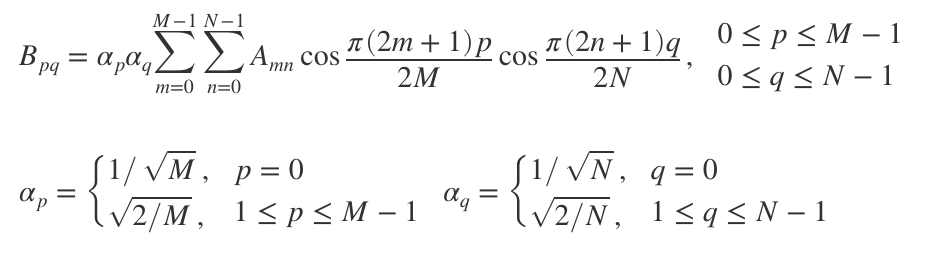

In [5]:
Img= Image.open('DCT.png','r')
Img

Here, in the code down below I am writing the algorithm from the equation above into a def function so that I could call it at any instance. The dct def function is a function to generate dct basis. 

The input of the basis function contains four parameters which are p,q,M and N. P and q are the dct coefficients, and they are assigned with different values at zero or else. Then I'm creating a meshgrid with the dimension of the product of M and N. 

In [ ]:
def dct(p,q,M,N):
    
            if p == 0:
                a_p = 1/((M)**(1/2))
             
            else:
                a_p = (2/M)**(1/2)  
                
            if q == 0:
                a_q = 1/((M)**(1/2))
                
            else:
                a_q = (2/M)**(1/2)  
                

            nx, ny = (M, N)
            x = np.linspace(1, M, nx)
            y = np.linspace(1, N, ny)
            xv, yv = np.meshgrid(x, y)
            T1 = np.cos(np.pi*(a_p/2/M) * (2 * xv + 1))
            T2 = np.cos(np.pi*(a_q/2/N) * (2 * yv + 1))
            B = np.matmul(a_p * a_q * T1, T2)
            B2 = np.reshape(B,(1,64))
            Adct[k,:] = B2[:]
            return Adct
            


In [392]:
mat = dct(p,q,8,8)
mat.shape

(64, 64)

In [ ]:
 k = 1
M = 8
N = 8
basis = np.zeros(shape = (M*N,M*N))
for p in range(0,M):
    for q in range(0,N):
        
        mat = dct(p,q,M,N)
        
        basis[k,:] = mat[:]
        k = k + 1
        



In [ ]:
M = 16
N = 16
basis2 = np.zeros(shape = (M*N,M*N))
for p in range(0,M):
    for q in range(0,N):
        
        mat = dct(p,q,M,N)
        
        basis[k,:] = mat[:]
        k = k + 1

Then to generate the dct basis, I wrote a nested for loop for p and q from 0 to each x and v dimensions. The basis are shaped with, say if its a 8 by 8 dimension, 64 by 64 matrix. The basis is fitting at each row with 64 columns of every element from the 8 by 8 matrix for 64 iterations to generate a 64 by 64 matrix basis map. 

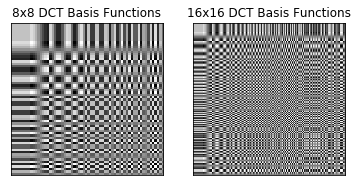

<function matplotlib.pyplot.show>

In [420]:
    
plt.subplot(121),plt.imshow(basis,cmap='gist_gray'),plt.title('8x8 DCT Basis Functions')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(basis2,cmap='gist_gray'),plt.title('16x16 DCT Basis Functions')
plt.xticks([]), plt.yticks([])
plt.show()
plt.show

Here is the result of the dct basis function of 8 by 8 and 16 by 16 matrix sizes. The size of the dct function can be easily changed via changing the parameter values of M and N. 

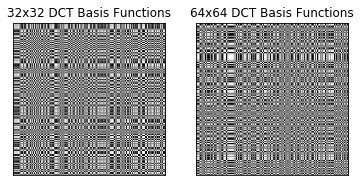

<function matplotlib.pyplot.show>

In [421]:
M = 4
N = 8
basis2 = np.zeros(shape = (M*N,M*N))
for p in range(0,M):
    for q in range(0,N):
        
        mat = dct(p,q,M,N)
        
        basis[k,:] = mat[:]
        k = k + 1
        
M = 8
N = 8
basis2 = np.zeros(shape = (M*N,M*N))
for p in range(0,M):
    for q in range(0,N):
        
        mat = dct(p,q,M,N)
        
        basis[k,:] = mat[:]
        k = k + 1
plt.subplot(121),plt.imshow(basis,cmap='gist_gray'),plt.title('32x32 DCT Basis Functions')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(basis2,cmap='gist_gray'),plt.title('64x64 DCT Basis Functions')
plt.xticks([]), plt.yticks([])
plt.show()
plt.show

Here are some more explorations of higher dimensions matrix dct basis functions. The meaning of dct functions is to change from matrix values to frequency values. It is clearly to see the brightness distribution of the original linespace meshgrids at a 8 by 8 map. The left most corner shows brighter pixels with more pattenrs when moving to the right most corner. When increasing the dimension, the pattern is easier to see. With 16 by 16 dct basis, we basically fitting four 8 by 8 maps into one map. With a correct dct function, we could then form both low and high pass filters. 